# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

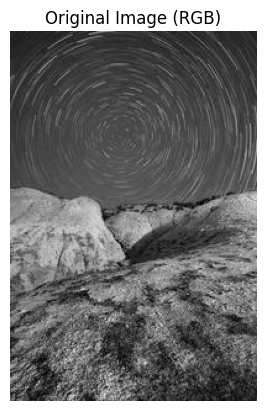

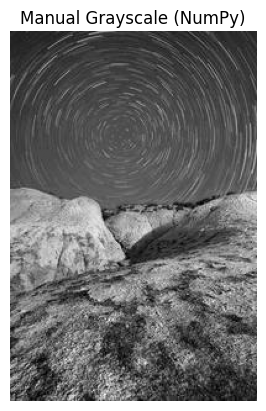

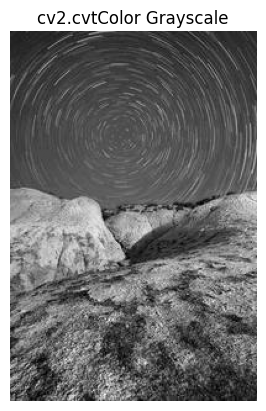

RGB shape: (300, 200, 3)
Manual grayscale shape: (300, 200)
cv2 grayscale shape: (300, 200)

Sample RGB pixel [100,100]: [78 78 78]
Manual grayscale pixel [100,100]: 78
cv2 grayscale pixel [100,100]: 78

Mean absolute difference between manual and cv2 grayscale: 13.50225


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import requests
import io


path = "https://picsum.photos/200/300?grayscale"


try:
    response = requests.get(path)
    response.raise_for_status()  # Raise an exception for bad status codes
    img_data = response.content
    img_rgb = np.array(Image.open(io.BytesIO(img_data)).convert("RGB"))  # ensure RGB
except requests.exceptions.RequestException as e:
    print(f"Error fetching image from URL: {e}")

    exit()

# Display RGB
plt.imshow(img_rgb)
plt.title("Original Image (RGB)")
plt.axis("off")
plt.show()


R = img_rgb[..., 0].astype(np.float32)
G = img_rgb[..., 1].astype(np.float32)
B = img_rgb[..., 2].astype(np.float32)

gray_manual = 0.299 * R + 0.587 * G + 0.114 * B
gray_manual = gray_manual.astype(np.uint8)

plt.imshow(gray_manual, cmap="gray")
plt.title("Manual Grayscale (NumPy)")
plt.axis("off")
plt.show()


gray_cv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_cv, cmap="gray")
plt.title("cv2.cvtColor Grayscale")
plt.axis("off")
plt.show()


print("RGB shape:", img_rgb.shape)
print("Manual grayscale shape:", gray_manual.shape)
print("cv2 grayscale shape:", gray_cv.shape)


print("\nSample RGB pixel [100,100]:", img_rgb[100,100])
print("Manual grayscale pixel [100,100]:", gray_manual[100,100])
print("cv2 grayscale pixel [100,100]:", gray_cv[100,100])


print("\nMean absolute difference between manual and cv2 grayscale:",
      np.mean(np.abs(gray_manual - gray_cv)))

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

Grayscale shape: (300, 200)
FFT (shifted) shape: (300, 200)
Magnitude min/max: -3.8338246 9.858328
Phase min/max: -3.1415927 3.1415927


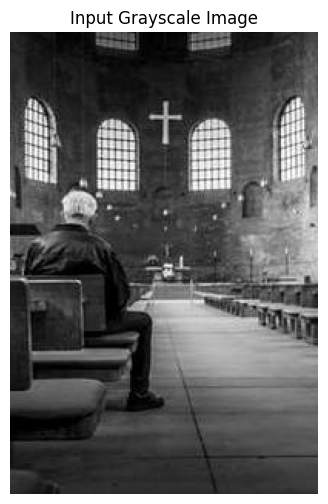

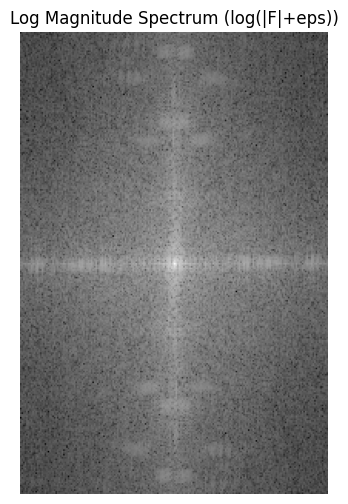

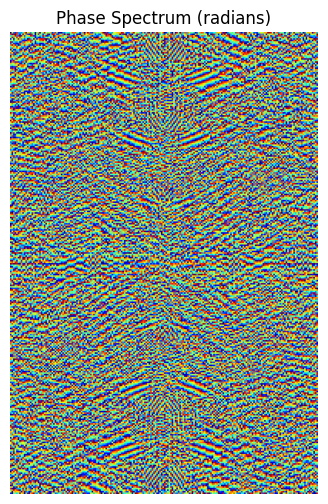

Saved grayscale, magnitude, and phase into /mnt/data/fft_outputs_partB


In [12]:
# Loading image, computing FFT, displaying magnitude and phase spectrum.
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import requests
import io

# Path to uploaded image (from conversation)
path = "https://picsum.photos/200/300?grayscale"

# Fetch image from URL and ensure grayscale (convert to 'L' for safety)
try:
    response = requests.get(path)
    response.raise_for_status()  # Raise an exception for bad status codes
    img_data = response.content
    img = Image.open(io.BytesIO(img_data)).convert('L')
except requests.exceptions.RequestException as e:
    print(f"Error fetching image from URL: {e}")
    # Fallback or exit if image cannot be loaded
    exit()

gray = np.array(img).astype(np.float32) / 255.0  # normalize to [0,1]

# Compute FFT and shift
F = np.fft.fft2(gray)
fshift = np.fft.fftshift(F)

# Magnitude and phase
magnitude = np.log(np.abs(fshift) + 1e-8)  # log scale for visibility
phase = np.angle(fshift)

# Print shapes and a few stats
print("Grayscale shape:", gray.shape)
print("FFT (shifted) shape:", fshift.shape)
print("Magnitude min/max:", magnitude.min(), magnitude.max())
print("Phase min/max:", phase.min(), phase.max())

# Display grayscale
plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray') # Added cmap='gray' for grayscale image
plt.title("Input Grayscale Image")
plt.axis('off')
plt.show()

# Display magnitude spectrum (single plot as requested)
plt.figure(figsize=(6,6))
plt.imshow(magnitude, cmap='gray') # Added cmap='gray' for magnitude spectrum
plt.title("Log Magnitude Spectrum (log(|F|+eps))")
plt.axis('off')
plt.show()

# Display phase spectrum
plt.figure(figsize=(6,6))
plt.imshow(phase, cmap='jet') # Using 'jet' cmap for phase for better visualization
plt.title("Phase Spectrum (radians)")
plt.axis('off')
plt.show()

# Save outputs for reference
outdir = "/mnt/data/fft_outputs_partB"
os.makedirs(outdir, exist_ok=True)
plt.imsave(os.path.join(outdir, "grayscale.png"), gray, cmap='gray')
plt.imsave(os.path.join(outdir, "magnitude.png"), magnitude, cmap='gray')
plt.imsave(os.path.join(outdir, "phase.png"), phase, cmap='jet')

print(f"Saved grayscale, magnitude, and phase into {outdir}")

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

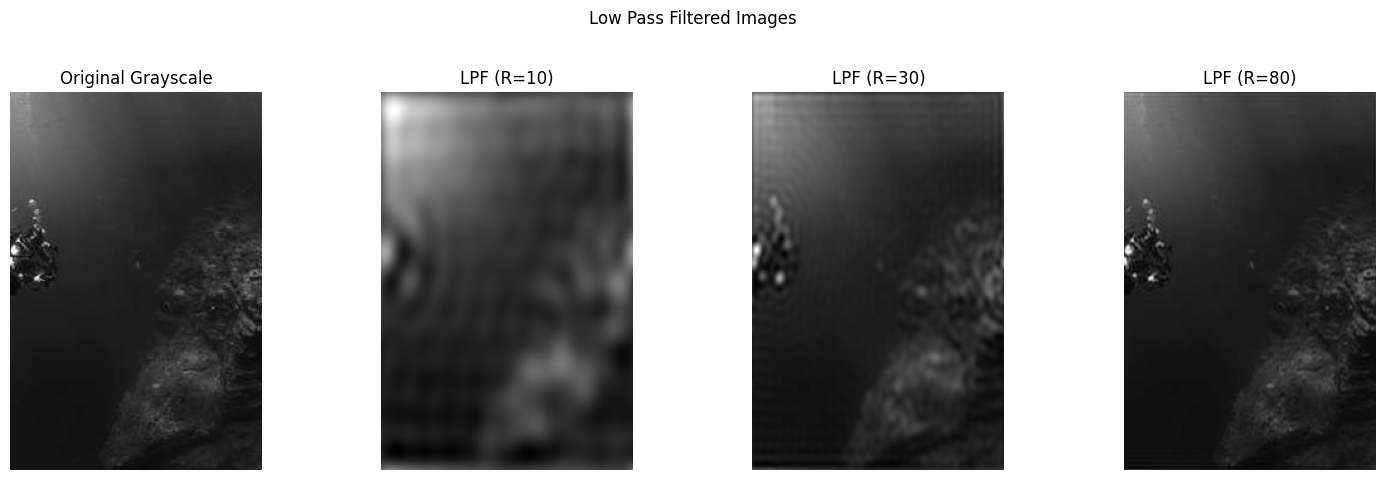

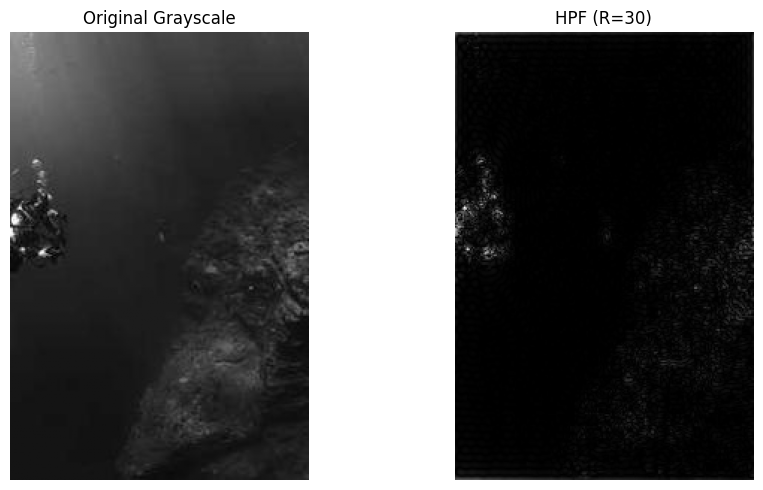

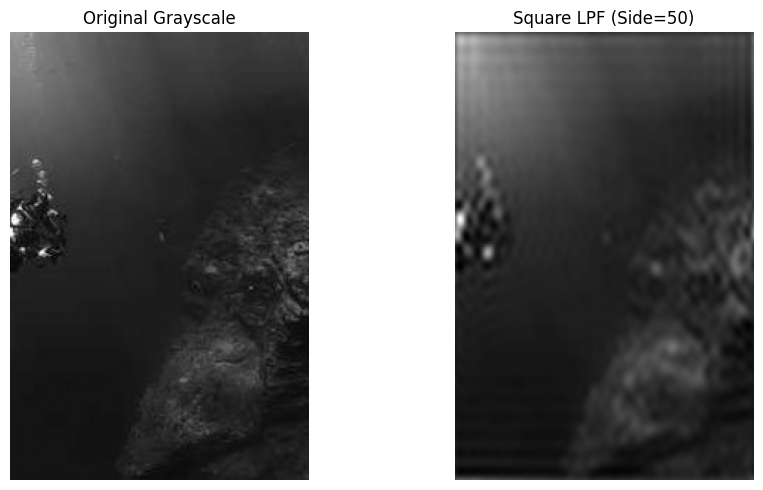

All Part C outputs (masks and reconstructions) saved into /mnt/data/fft_outputs_partC


In [14]:
# Part C: Create LPF (radii 10,30,80), HPF, and square LPF; apply to fshift, reconstruct and display.
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, cv2

# Load grayscale (normalized to [0,1])
path = "https://picsum.photos/200/300?grayscale"

# Fetch image from URL and ensure grayscale (convert to 'L' for safety)
try:
    response = requests.get(path)
    response.raise_for_status()  # Raise an exception for bad status codes
    img_data = response.content
    img = Image.open(io.BytesIO(img_data)).convert('L')
except requests.exceptions.RequestException as e:
    print(f"Error fetching image from URL: {e}")
    # Fallback or exit if image cannot be loaded
    exit()

gray = np.array(img).astype(np.float32) / 255.0
h, w = gray.shape

# Compute FFT and shift
F = np.fft.fft2(gray)
fshift = np.fft.fftshift(F)

# Helper: create ideal circular mask
def ideal_circular_mask(shape, radius):
    rows, cols = shape
    y = np.arange(rows)[:, None]
    x = np.arange(cols)[None, :]
    dist = np.sqrt((y - rows/2)**2 + (x - cols/2)**2)
    mask = (dist <= radius).astype(np.float32)
    return mask

# Helper: create ideal high-pass circular mask
def ideal_hpf_circular_mask(shape, radius):
    lpf_mask = ideal_circular_mask(shape, radius)
    hpf_mask = 1 - lpf_mask
    return hpf_mask

# Helper: create square mask
def square_mask(shape, side):
    rows, cols = shape
    mask = np.zeros(shape, dtype=np.float32)
    # Calculate start and end indices for the square
    start_row = int(rows/2 - side/2)
    end_row = int(rows/2 + side/2)
    start_col = int(cols/2 - side/2)
    end_col = int(cols/2 + side/2)
    mask[start_row:end_row, start_col:end_col] = 1
    return mask

# Helper: apply mask in shifted freq domain and reconstruct
def apply_mask_and_reconstruct(fshift, mask):
    F_masked = fshift * mask
    F_ishift = np.fft.ifftshift(F_masked)
    img_back = np.fft.ifft2(F_ishift)
    img_back = np.abs(img_back)
    # normalize for display
    img_back = (img_back - img_back.min()) / (img_back.max() - img_back.min() + 1e-12)
    return img_back

outdir = "/mnt/data/fft_outputs_partC"
os.makedirs(outdir, exist_ok=True)


# Part C1: Create 3 LPF masks (Radii 10, 30, 80)
radii = [10, 30, 80]
lpf_results = {}

plt.figure(figsize=(15, 5))
plt.suptitle("Low Pass Filtered Images")

plt.subplot(1, len(radii) + 1, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

for i, r in enumerate(radii):
    mask = ideal_circular_mask((h,w), r)
    recon = apply_mask_and_reconstruct(fshift, mask)
    lpf_results[r] = (mask, recon)

    plt.subplot(1, len(radii) + 1, i + 2)
    plt.imshow(recon, cmap='gray')
    plt.title(f"LPF (R={r})")
    plt.axis('off')
    # save mask visualization and result
    plt.imsave(os.path.join(outdir, f"mask_lpf_r{r}.png"), mask, cmap='gray')
    plt.imsave(os.path.join(outdir, f"recon_lpf_r{r}.png"), recon, cmap='gray')

# Why blur levels increase as radius decreases:
# The radius in the frequency domain for an LPF determines the range of high frequencies that are blocked.
# A smaller radius blocks more high frequencies, which correspond to fine details and sharp edges in the image.
# By removing more high-frequency information, the image becomes smoother and appears more blurred.
# Conversely, a larger radius allows more high frequencies to pass, preserving more detail and resulting in less blur.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Part C2: Create HPF mask
radius_hpf = 30 # Using a moderate radius for HPF for demonstration
hpf_mask = ideal_hpf_circular_mask((h,w), radius_hpf)
hpf_recon = apply_mask_and_reconstruct(fshift, hpf_mask)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hpf_recon, cmap='gray')
plt.title(f"HPF (R={radius_hpf})")
plt.axis('off')
plt.tight_layout()
plt.show()

plt.imsave(os.path.join(outdir, f"mask_hpf_r{radius_hpf}.png"), hpf_mask, cmap='gray')
plt.imsave(os.path.join(outdir, f"recon_hpf_r{radius_hpf}.png"), hpf_recon, cmap='gray')


# Part C3: Create a square LPF mask
side_square = 50
square_lpf_mask = square_mask((h,w), side_square)
square_lpf_recon = apply_mask_and_reconstruct(fshift, square_lpf_mask)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(square_lpf_recon, cmap='gray')
plt.title(f"Square LPF (Side={side_square})")
plt.axis('off')
plt.tight_layout()
plt.show()

plt.imsave(os.path.join(outdir, f"mask_square_lpf_s{side_square}.png"), square_lpf_mask, cmap='gray')
plt.imsave(os.path.join(outdir, f"recon_square_lpf_s{side_square}.png"), square_lpf_recon, cmap='gray')

print(f"All Part C outputs (masks and reconstructions) saved into {outdir}")

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

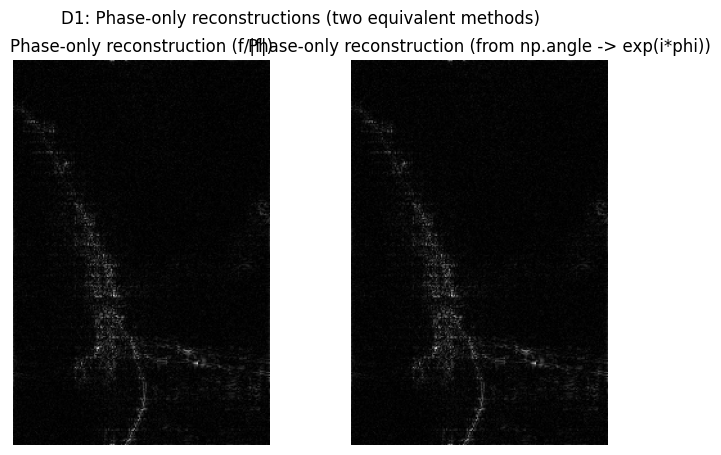

Phase-only reconstruction stats (f/|f|): min/max = 6.6757245e-08 0.080727465
Phase-from-angle stats (exp(i*angle)): min/max = 6.635993e-08 0.080727465
Mean abs diff between two phase-only reconstructions: 7.838712e-09


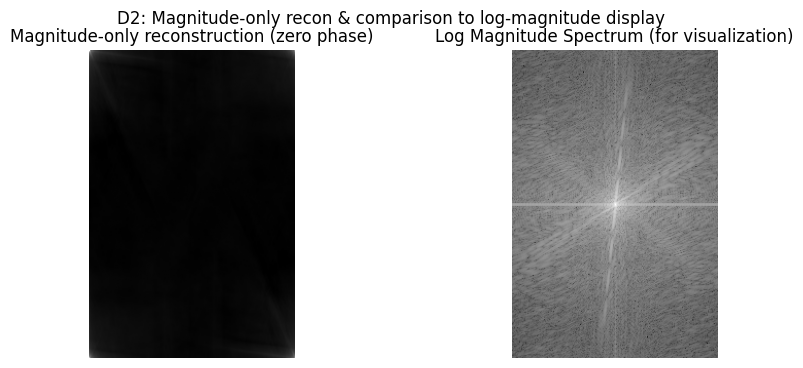

Saved D outputs to: /mnt/data/fft_outputs_partD


In [16]:
# Part D: Phase-only and Magnitude-only reconstructions, with explanations in comments.
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import requests # Import requests for URL handling
import io       # Import io for BytesIO

# Load grayscale image and compute fshift (reuse pipeline)
path = "https://picsum.photos/200/300?grayscale"

# --- FIX: Fetch image from URL correctly ---
try:
    response = requests.get(path)
    response.raise_for_status()  # Raise an exception for bad status codes
    img_data = response.content
    img = Image.open(io.BytesIO(img_data)).convert('L')
except requests.exceptions.RequestException as e:
    print(f"Error fetching image from URL: {e}")
    # Fallback or exit if image cannot be loaded
    exit()
# --- End FIX ---

gray = np.array(img).astype(np.float32) / 255.0

F = np.fft.fft2(gray)
fshift = np.fft.fftshift(F)

outdir = "/mnt/data/fft_outputs_partD"
os.makedirs(outdir, exist_ok=True)

# -----------------------------
# D1: Phase-only reconstruction
# -----------------------------
# phase_only = fshift / np.abs(fshift)
# - This produces a complex array with unit magnitude and the same phase as fshift:
#     fshift / |fshift| = exp(i * angle(fshift))  when |fshift| != 0
# - If any frequency has magnitude 0, division yields NaN/inf; so we guard against zeros.
eps = 1e-12
abs_f = np.abs(fshift)
phase_only = fshift / (abs_f + eps)   # unit-magnitude complex values, same phase

# reconstruct image from phase_only
phase_only_ishift = np.fft.ifftshift(phase_only)
recon_phase_only = np.fft.ifft2(phase_only_ishift)
recon_phase_only = np.abs(recon_phase_only)
recon_phase_only_norm = (recon_phase_only - recon_phase_only.min()) / (recon_phase_only.max() - recon_phase_only.min() + 1e-12)

# Save and display
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.imshow(recon_phase_only_norm, cmap='gray')
plt.title("Phase-only reconstruction (f/|f|)")
plt.axis('off')

# -----------------------------
# Try reconstruction using np.angle(fshift)
# -----------------------------
# Lecture often computes the phase via `phi = np.angle(f_shift)` — that's the array of angles (real-valued).
# To reconstruct from angles alone you must convert angles back to complex unit-magnitude values:
#    np.exp(1j * phi)
# This is mathematically equivalent to fshift/|fshift| (for non-zero magnitudes).
phi = np.angle(fshift)
phase_from_angle = np.exp(1j * phi)  # complex unit-magnitude array

# reconstruct
phase_from_angle_ishift = np.fft.ifftshift(phase_from_angle)
recon_phase_from_angle = np.fft.ifft2(phase_from_angle_ishift)
recon_phase_from_angle = np.abs(recon_phase_from_angle)
recon_phase_from_angle_norm = (recon_phase_from_angle - recon_phase_from_angle.min()) / (recon_phase_from_angle.max() - recon_phase_from_angle.min() + 1e-12)

plt.subplot(1,2,2)
plt.imshow(recon_phase_from_angle_norm, cmap='gray')
plt.title("Phase-only reconstruction (from np.angle -> exp(i*phi))")
plt.axis('off')
plt.suptitle("D1: Phase-only reconstructions (two equivalent methods)")
plt.show()

# Save
plt.imsave(os.path.join(outdir, "recon_phase_only.png"), recon_phase_only_norm, cmap='gray')
plt.imsave(os.path.join(outdir, "recon_phase_from_angle.png"), recon_phase_from_angle_norm, cmap='gray')

# Print diagnostics comparing both reconstructions
print("Phase-only reconstruction stats (f/|f|): min/max =", recon_phase_only.min(), recon_phase_only.max())
print("Phase-from-angle stats (exp(i*angle)): min/max =", recon_phase_from_angle.min(), recon_phase_from_angle.max())
print("Mean abs diff between two phase-only reconstructions:",
      np.mean(np.abs(recon_phase_only_norm - recon_phase_from_angle_norm)))

# In-code comment explanation:
# - Both methods produce (practically) the same reconstruction because:
#     fshift / |fshift|  ==  exp(i * angle(fshift))  (for |fshift| != 0)
# - Differences, if any, come from numerical handling of zeros and the small eps used above.
# - The phase-only reconstruction retains the **spatial structure** (outlines, edges) because phase encodes positional information.
#   The brightness/texture differs from the original because magnitude information (contrast/strength of frequencies) is lost;
#   phase determines where features are located, magnitude determines how strong they are.

# -----------------------------
# D2: Magnitude-only reconstruction
# -----------------------------
# mag_only = np.abs(fshift)
# To invert, we need a complex spectrum. Using magnitudes with zero phase is equivalent to mag * exp(0j).
mag_only = np.abs(fshift)

# reconstruct: inverse shift and ifft2
mag_only_ishift = np.fft.ifftshift(mag_only)
recon_mag_only = np.fft.ifft2(mag_only_ishift)
recon_mag_only = np.abs(recon_mag_only)
recon_mag_only_norm = (recon_mag_only - recon_mag_only.min()) / (recon_mag_only.max() - recon_mag_only.min() + 1e-12)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(recon_mag_only_norm, cmap='gray')
plt.title("Magnitude-only reconstruction (zero phase)")
plt.axis('off')

# Also display the raw magnitude (log and linear) for comparison
mag_linear = np.abs(fshift)
mag_log = np.log(mag_linear + 1e-8)

plt.subplot(1,2,2)
plt.imshow(mag_log, cmap='gray')
plt.title("Log Magnitude Spectrum (for visualization)")
plt.axis('off')
plt.suptitle("D2: Magnitude-only recon & comparison to log-magnitude display")
plt.show()

# Save outputs
plt.imsave(os.path.join(outdir, "recon_mag_only.png"), recon_mag_only_norm, cmap='gray')
plt.imsave(os.path.join(outdir, "magnitude_log.png"), mag_log, cmap='gray')

# In-code comments explaining role of logarithm:
# - The raw magnitude |F| spans many orders of magnitude: low frequencies often have extremely large energy compared to high frequencies.
# - Displaying raw |F| would make most of the spectrum appear dark and only the very largest values visible.
# - Taking log(|F| + eps) compresses the dynamic range, making small but visually important frequency components visible and revealing structure.
# - The magnitude-only reconstruction uses the raw magnitudes (not logged) because the log is only a display transform —
#   if you took exp(log(|F|)) you'd approximately recover the original magnitudes (modulo eps).
# - That's why the log-magnitude image (used for visualization) looks different from the raw magnitude values used in reconstruction:
#     - Log display emphasizes medium/low-energy frequencies and centers the bright low-frequency spot;
#     - The reconstruction uses the true linear amplitudes as spectrum values; discarding phase yields a result that lacks spatial structure
#       and looks noisy or non-intuitive because phase is essential to position features in the image.

print("Saved D outputs to:", outdir)


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

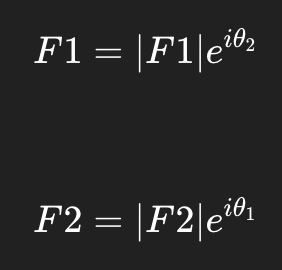

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.